Dados obtidos do site <a href="https://brasil.io">Brasil.io</a>. O qual disponibiliza não apenas os dados como também documentação, diversas visualizações dos dados, uma API de acesso além do código fonte de tudo.

URL direta dos dados: <a href="https://brasil.io/dataset/covid19/files/">https://brasil.io/dataset/covid19/files/</a>.

Data de download: 02/03/2021 

<h2>Pré-processamento</h2>
Criar, alterar, ou adicionar dados que nos permitam mehorar o processamento, melhorando a consistência, completude, confiabilidade e o conjunto de dados mais fácil de ser interpretado.

Carga da biblioteca gráfica:

In [1]:
library("ggplot2")

Carga dos dados.

In [2]:
dados <- read.csv("../input/covid19/caso.csv", header = TRUE, stringsAsFactors = FALSE)

Vamos manter apenas os dados dos municípios do estado do Rio de Janeiro e vamos remover colunas que não serão utilizadas: <i>state</i> (é sempre <i>RJ</i>), <i>place_type</i> (é sempre <i>city</i>) e <i>estimated_population_2019</i> (desatualizada)

Além disso, retirar os <i>Importados/Indefinidos</i>:

In [3]:
dados <- dados[dados$state == "RJ" & dados$place_type == "city", ]
dados <- dados[ , - c(2, 4, 9)] # state, place_type, estimated_population_2019
dados <- dados[dados$city != "Importados/Indefinidos", ]

<h3>Número de mortes por dia</h3>
Vamos criar um novo atributo com o número de mortes por dia:

In [4]:
dados$deaths_day <- 0

municipios <- sort(unique(dados$city))

for (municipio in municipios) {
  indices <- sort(dados[dados$city == municipio, "order_for_place"])
  acumulado <- 0
  for (indice in indices) {
    mortes_no_dia <- dados[dados$city == municipio & dados$order_for_place == indice, "deaths"] - acumulado
    dados[dados$city == municipio & dados$order_for_place == indice, "deaths_day"] <- mortes_no_dia
    acumulado <- dados[dados$city == municipio & dados$order_for_place == indice, "deaths"]
  }
}

Em R deve ser possível fazer sem usar dois laços (um <i>for</i> dentro do outro). Ainda vou tentar descobrir como...

Ficou tudo certo? Ficou algum número negativo?

In [5]:
any(dados$deaths_day < 0)

[1] TRUE

Eita! Será que eu errei no código? Vejamos os dados:

In [6]:
dados[dados$deaths_day < 0,]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
798778,2021-02-25,Angra dos Reis,10868,346,329,False,207044,3300100,5249.12579,0.0318,-1
798978,2020-08-06,Angra dos Reis,3976,119,129,False,207044,3300100,1920.36475,0.0299,-1
799039,2020-06-05,Angra dos Reis,1081,41,68,False,207044,3300100,522.11124,0.0379,-1
799705,2020-06-07,Araruama,219,28,66,False,134293,3300209,163.07626,0.1279,-1
799829,2021-01-13,Areal,328,9,272,False,12669,3300225,2588.99676,0.0274,-1
800340,2020-07-14,Armação dos Búzios,188,8,92,False,34477,3300233,545.29106,0.0426,-2
800892,2020-11-16,Barra Mansa,3874,181,247,False,184833,3300407,2095.94607,0.0467,-1
801025,2020-07-04,Barra Mansa,567,35,114,False,184833,3300407,306.76340,0.0617,-1
801509,2021-02-14,Belford Roxo,16796,426,322,False,513118,3300456,3273.32115,0.0254,-1


Vamos olhar um exemplo e ver os dados originais, o próprio registro e uns antes:

In [7]:
dados[dados$city == "Araruama" & dados$order_for_place %in% c(64, 65, 66, 67),]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
799704,2020-06-08,Araruama,219,28,67,False,134293,3300209,163.0763,0.1279,0
799705,2020-06-07,Araruama,219,28,66,False,134293,3300209,163.0763,0.1279,-1
799706,2020-06-06,Araruama,163,29,65,False,134293,3300209,121.3764,0.1779,1
799707,2020-06-05,Araruama,160,28,64,False,134293,3300209,119.1425,0.1750,0


Ficou difícil de ver, vamos melhorar isso, vendo só algumas colunas:

In [8]:
dados[dados$city == "Araruama" & dados$order_for_place %in% c(64, 65, 66, 67), c(1,2,4,11)]

,date,city,deaths,deaths_day
,<chr>,<chr>,<int>,<dbl>
799704,2020-06-08,Araruama,28,0
799705,2020-06-07,Araruama,28,-1
799706,2020-06-06,Araruama,29,1
799707,2020-06-05,Araruama,28,0


Do dia <i>2020-06-06</i> para o dia <i>2020-06-07</i> alguém ressucitou!!! Aleluia!

Ou os dados não são confiáveis... Talvez não por culpa do pessoal do Brasil.io, mas sim das secretarias de saúde.

Qual o pior caso?

In [9]:
dados[dados$deaths_day == min(dados$deaths_day),]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
814814,2020-12-24,Niterói,22420,675,282,False,515317,3303302,4350.72,0.0301,-111


Cento e onze ressucitaram no mesmo dia! Vamos ver mais detalhes:

In [10]:
dados[dados$city == "Niterói" & dados$order_for_place %in% c(281, 282, 283), c(1,2,4,11)]

,date,city,deaths,deaths_day
,<chr>,<chr>,<int>,<dbl>
814813,2020-12-25,Niterói,675,0
814814,2020-12-24,Niterói,675,-111
814815,2020-12-23,Niterói,786,121


Sem muito o que fazer, vamos manter assim mesmo. Quem quiser pode zerar todos os negativos com o seguinte comando:
<i>dados[dados$deaths_day < 0, "deaths_day"] <- 0</i>

Como ficaram os dados?

In [11]:
max(dados$deaths_day)

min(dados$deaths_day)

[1] 307

[1] -111

Nada como um gráfico para ver como ficou o novo dado:

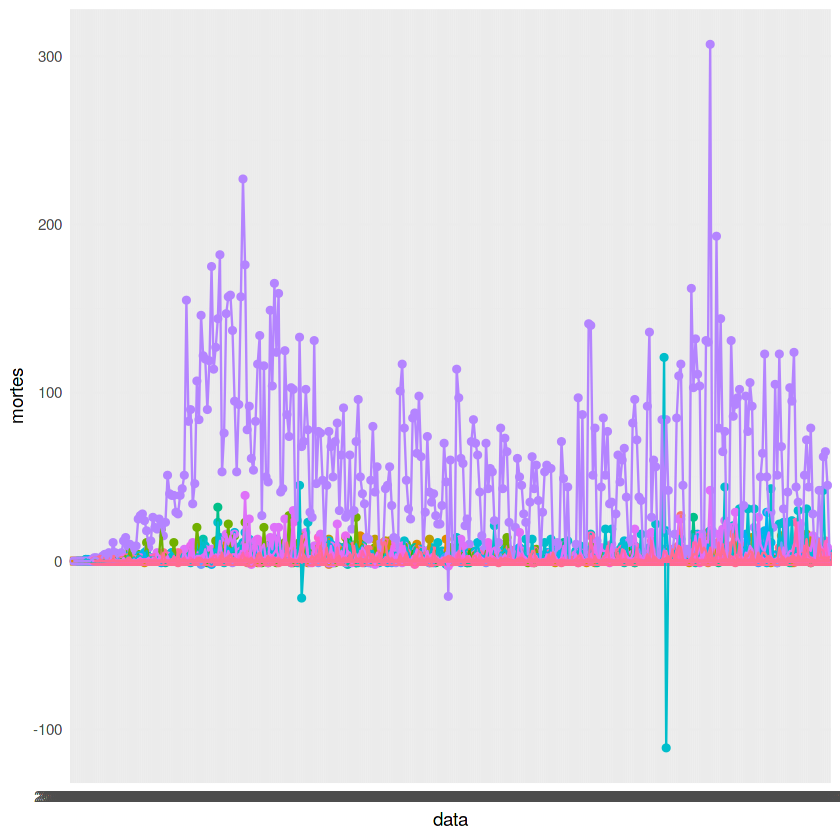

In [12]:
ggplot(dados, aes(x=date, y=deaths_day, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

Um único município passa de 200 mortes/dia (duas vezes) e com frequência passa de 100. A maioria não chega nem perto de 50 mortes/dia (ainda bem).

Que município é esse?

In [13]:
dados[dados$deaths_day > 200,]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
821579,2021-01-16,Rio de Janeiro,179478,16101,305,False,6747815,3304557,2659.794,0.0897,307
821802,2020-06-03,Rio de Janeiro,32951,4055,82,False,6747815,3304557,488.321,0.1231,227


Rio de Janeiro.

<h4>Número de mortes/dia 100k habitantes</h4>
Seria melhor se todos fossem medidos com uma mesma escala. Para comparar o número de mortes por dia de duas cidades (uma grande e uma pequena, por exemplo), é melhor dividir pelo tamanho da população. Os dados já trazem uma coluna que usa isso <i>confirmed_per_100k_inhabitants</i>, vamos algo parecido para o número de mortes por dia:

In [14]:
dados$deaths_day_per_100k_inhabitants <- 100000 * dados$deaths_day / dados$estimated_population

Vejamos como ficou:

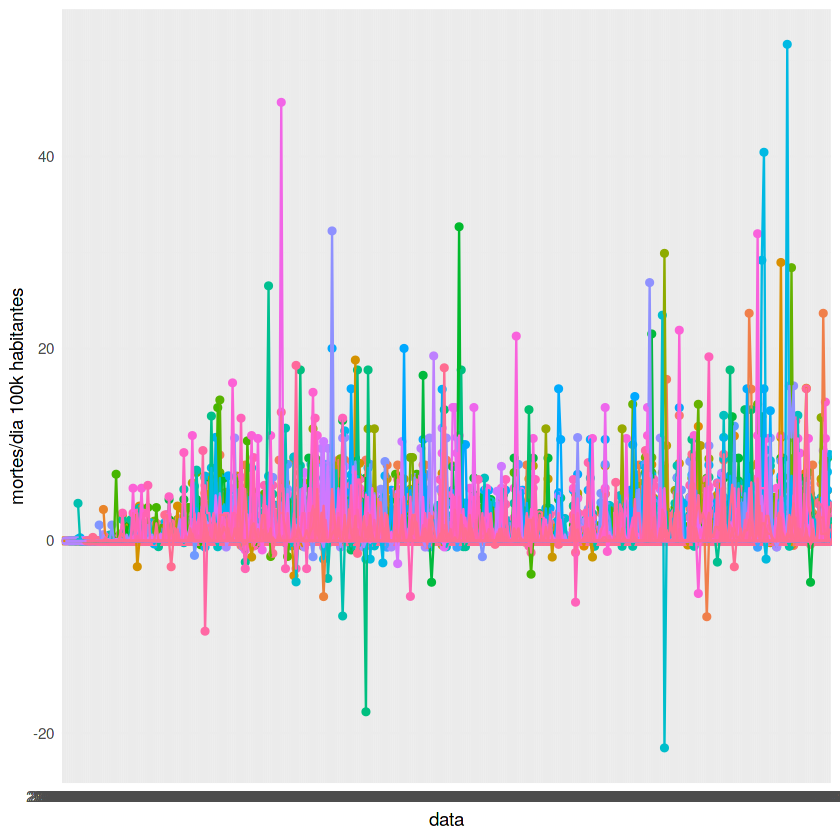

In [15]:
ggplot(dados, aes(x=date, y=deaths_day_per_100k_inhabitants, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes/dia 100k habitantes") +
  theme_minimal()

<h4>Padronização por z-score - número de mortes/dia 100k habitantes</h4>
Padronização por z-score, por município:
$z = \frac{x - \mu}{\sigma}$
Onde: $\mu$ é a média, e $\sigma$ é o desvio padrão.

In [16]:
dados$deaths_day_100k_zscore <- 0
for (municipio in municipios) {
  media <- mean(dados[dados$city == municipio, "deaths_day_per_100k_inhabitants"], na.rm = TRUE)
  desvio_padrao <- sd(dados[dados$city == municipio, "deaths_day_per_100k_inhabitants"], na.rm = TRUE)
  dados[dados$city == municipio, "deaths_day_100k_zscore"] <- ((dados[dados$city == municipio, "deaths_day_per_100k_inhabitants"] - media) / desvio_padrao)
}

Como ficaram os dados?

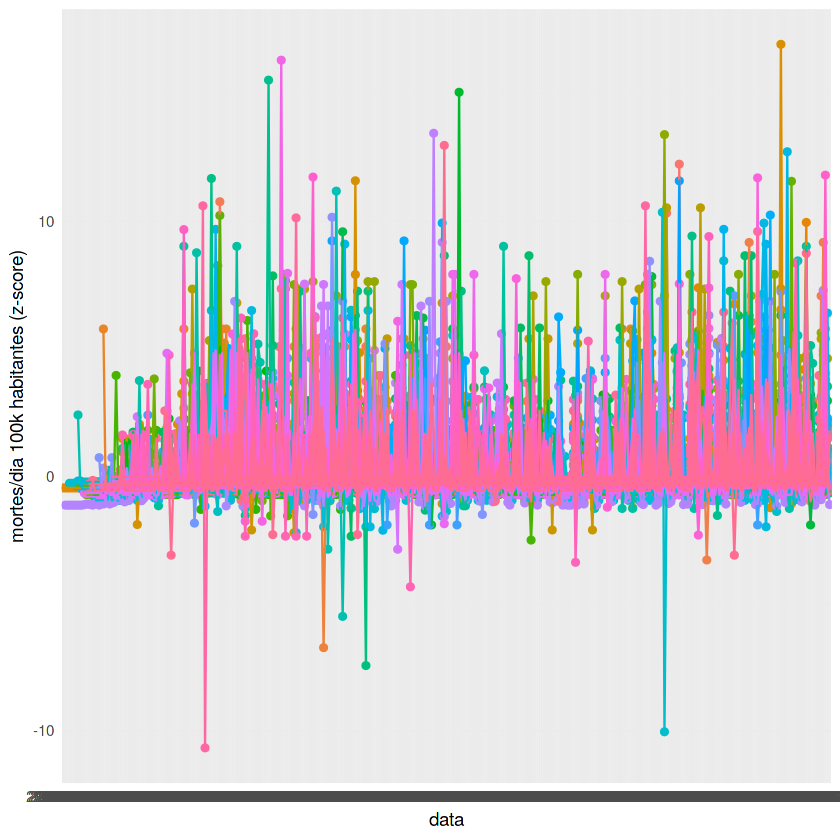

In [17]:
ggplot(dados, aes(x=date, y=deaths_day_100k_zscore, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes/dia 100k habitantes (z-score)") +
  theme_minimal()

Vejamos como ficou